In [28]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin
from matplotlib import pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

In [29]:
data = pd.read_csv("D:\Makeen\ProjectML\diabetes_prediction_dataset.csv")

In [30]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


 EDA

In [31]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


we have missing values

In [33]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [34]:
data.shape

(100000, 9)

In [35]:
data['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [36]:
data.isna()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [37]:
 data["HbA1c_level"].isna().any()

False

In [38]:
 data["gender"].isna().any()

False

In [39]:
# Identify columns with non-numeric data
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns.tolist()

# Drop non-numeric columns or convert them using one-hot encoding
data = pd.get_dummies(data, drop_first=True)


Split data

In [40]:
# Split the data into features (X) and target variable (y)
X = data.drop(['diabetes'],axis=1)
y = data['diabetes']

In [41]:
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,False,False,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,False,False,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,False,False,False,False,False,True,False


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

y_pred

array([-0.01068595, -0.04526431,  0.09533479, ..., -0.07025686,
        0.23281312,  0.09480094])

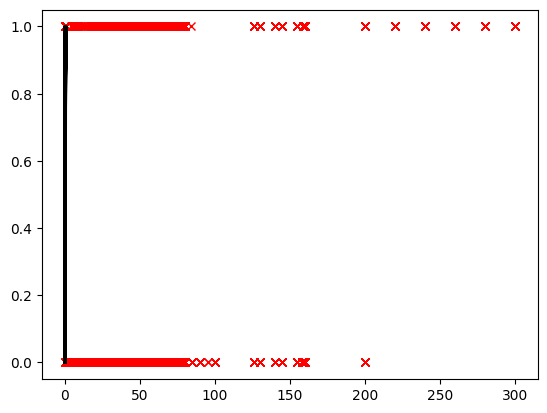

In [45]:
plt.plot(X_test, y_test,'rx')
plt.plot(y_pred,y_test, color='black')
plt.show()

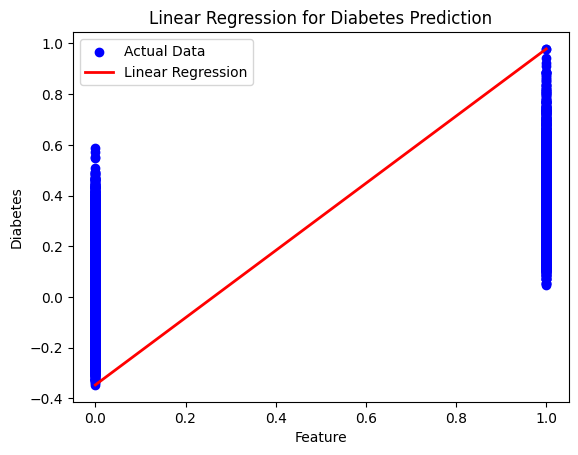

Linear Regression Model:
Mean Squared Error: 0.051179168858889484
R-squared: 0.3447543280602635


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the regression line along with the actual data points
plt.scatter(y_test, y_pred, color='blue', label='Actual Data')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Diabetes')
plt.legend()
plt.title('Linear Regression for Diabetes Prediction')
plt.show()

print("Linear Regression Model:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [47]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Make predictions on the test set
y_pred_l = logistic_model.predict(X_test)

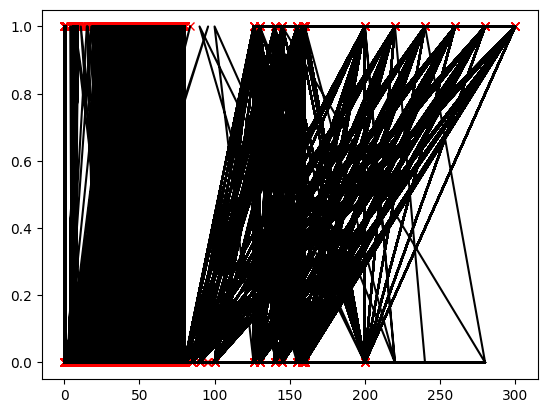

In [49]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred_l, color='black')
plt.show()

In [50]:
# Evaluate the model


In [53]:



# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract the values
tn, fp, fn, tp = conf_matrix.ravel()

print("True Negative (TN):", tn)
print("True Positive (TP):", tp)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

use Linear Regression (OLS closed form solution)

In [54]:
LR_model = LinearRegression()

In [55]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [56]:
LR_model.coef_, LR_model.intercept_

(array([ 0.00133803,  0.09244247,  0.11817645,  0.00405525,  0.08144681,
         0.00227524,  0.01268014, -0.04683423,  0.01052365,  0.00798245,
         0.02715048,  0.00978844,  0.01634411]),
 -0.8715818209053173)

In [57]:
LR_model.score(X_train, y_train)

0.3501273616613515

In [58]:
LR_model.score(X_test, y_test)

0.3447543280602635

In [59]:
mean_squared_error(LR_model.predict(X_train), y_train)

0.050489898519079916

In [60]:
y_hat = LR_model.predict(X_test)

In [61]:
y_hat

array([-0.01068595, -0.04526431,  0.09533479, ..., -0.07025686,
        0.23281312,  0.09480094])

In [62]:
mean_squared_error(y_hat, y_test)

0.051179168858889484